<a href="https://colab.research.google.com/github/aiAintEasy-HolyCalamity/CartPoleProblem/blob/main/ImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Image Recognition. 28x28 pixel images of handwritten digits (0-9).
#Demonstrates: Data preprocessing, Neural network training, Model evaluation
#Goal: Train a neural network to recognize handwritten digits. Dataset: MNIST
#Framework: TensorFlow/Keras, Output: Predict the digit (0-9) from an image.

In [2]:
#Install Dependencies
!pip install TensorFlow matplotlib numpy

In [3]:
#Load and Preprocess the Data
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data​
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Training samples:", X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28)


In [11]:
#Build the Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(128, activation='relu'),
Dense(10, activation='softmax') # 10 classes for digits 0-9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#Flatten: Converts 28x28 images into a 1D array.
#Dense Layers: neurons connected to every neuron in the next layer.
#ReLU Activation: Adds non-linearity.
#Softmax: Produces probability scores for each digit (0-9).

In [14]:
#Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8736 - loss: 0.4552 - val_accuracy: 0.9617 - val_loss: 0.1336
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9629 - loss: 0.1297 - val_accuracy: 0.9713 - val_loss: 0.1009
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9741 - loss: 0.0867 - val_accuracy: 0.9757 - val_loss: 0.0818
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9813 - loss: 0.0619 - val_accuracy: 0.9765 - val_loss: 0.0818
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9861 - loss: 0.0471 - val_accuracy: 0.9808 - val_loss: 0.0729


# Optimization Problem​

Scenario: A rectangular garden is to be constructed against a straight wall, so no fencing is needed along the wall side. The garden must enclose 120 square meters of area.

Fencing costs $10 per meter for the two sides perpendicular to the wall.

Fencing costs $5 per meter for the side opposite the wall (the front).

**Goal: Find the dimensions of the garden that will minimize the total cost of the fencing.**

 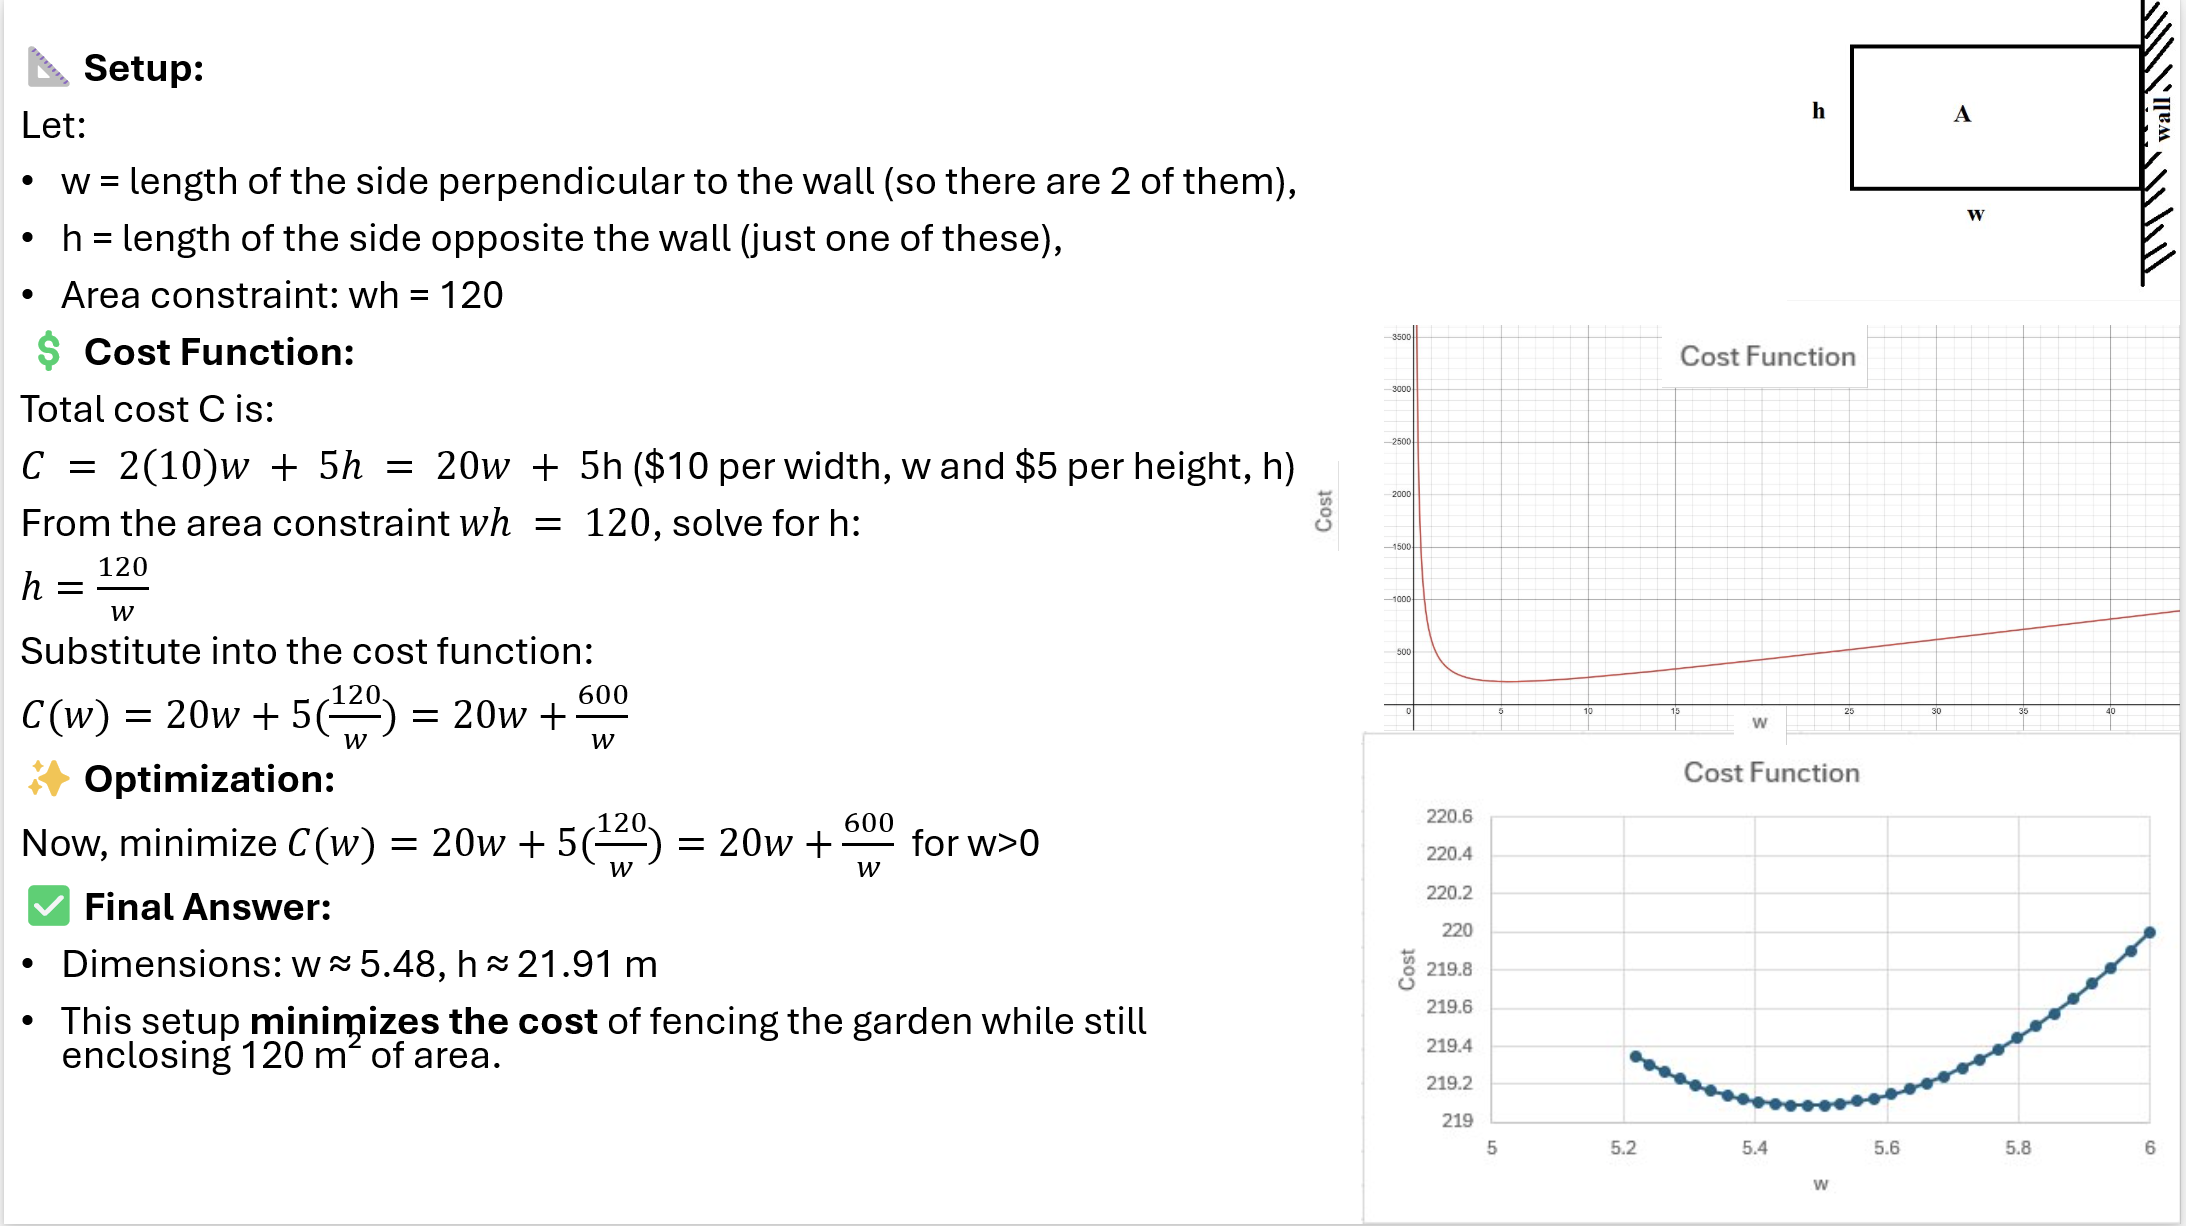




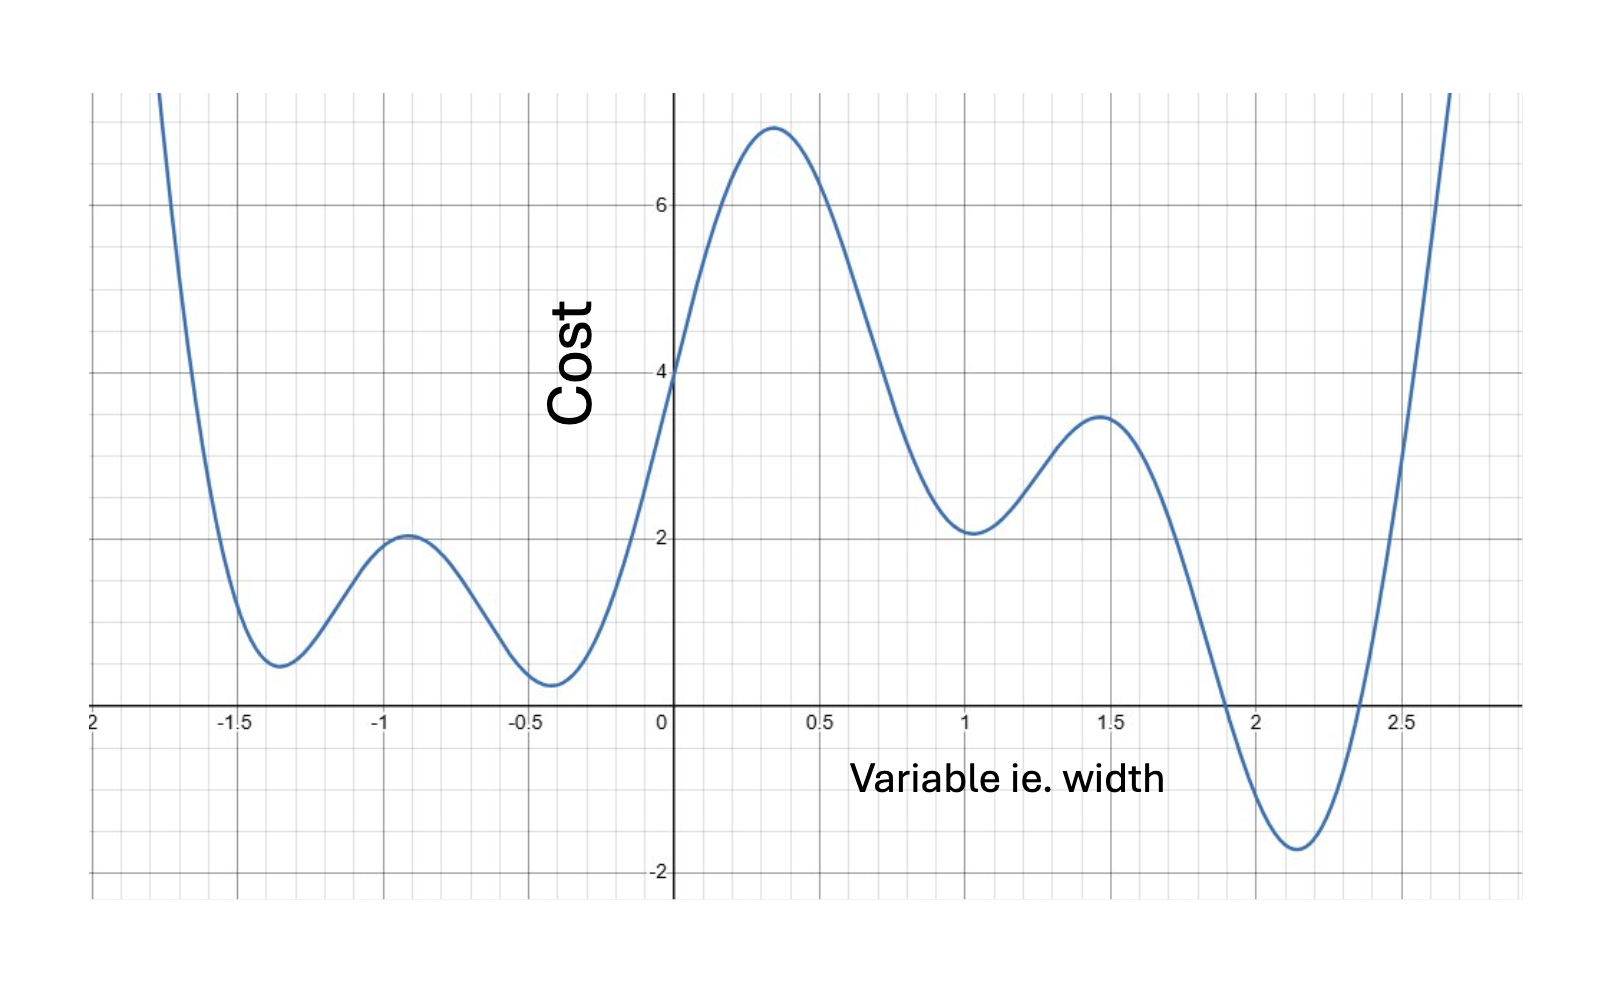

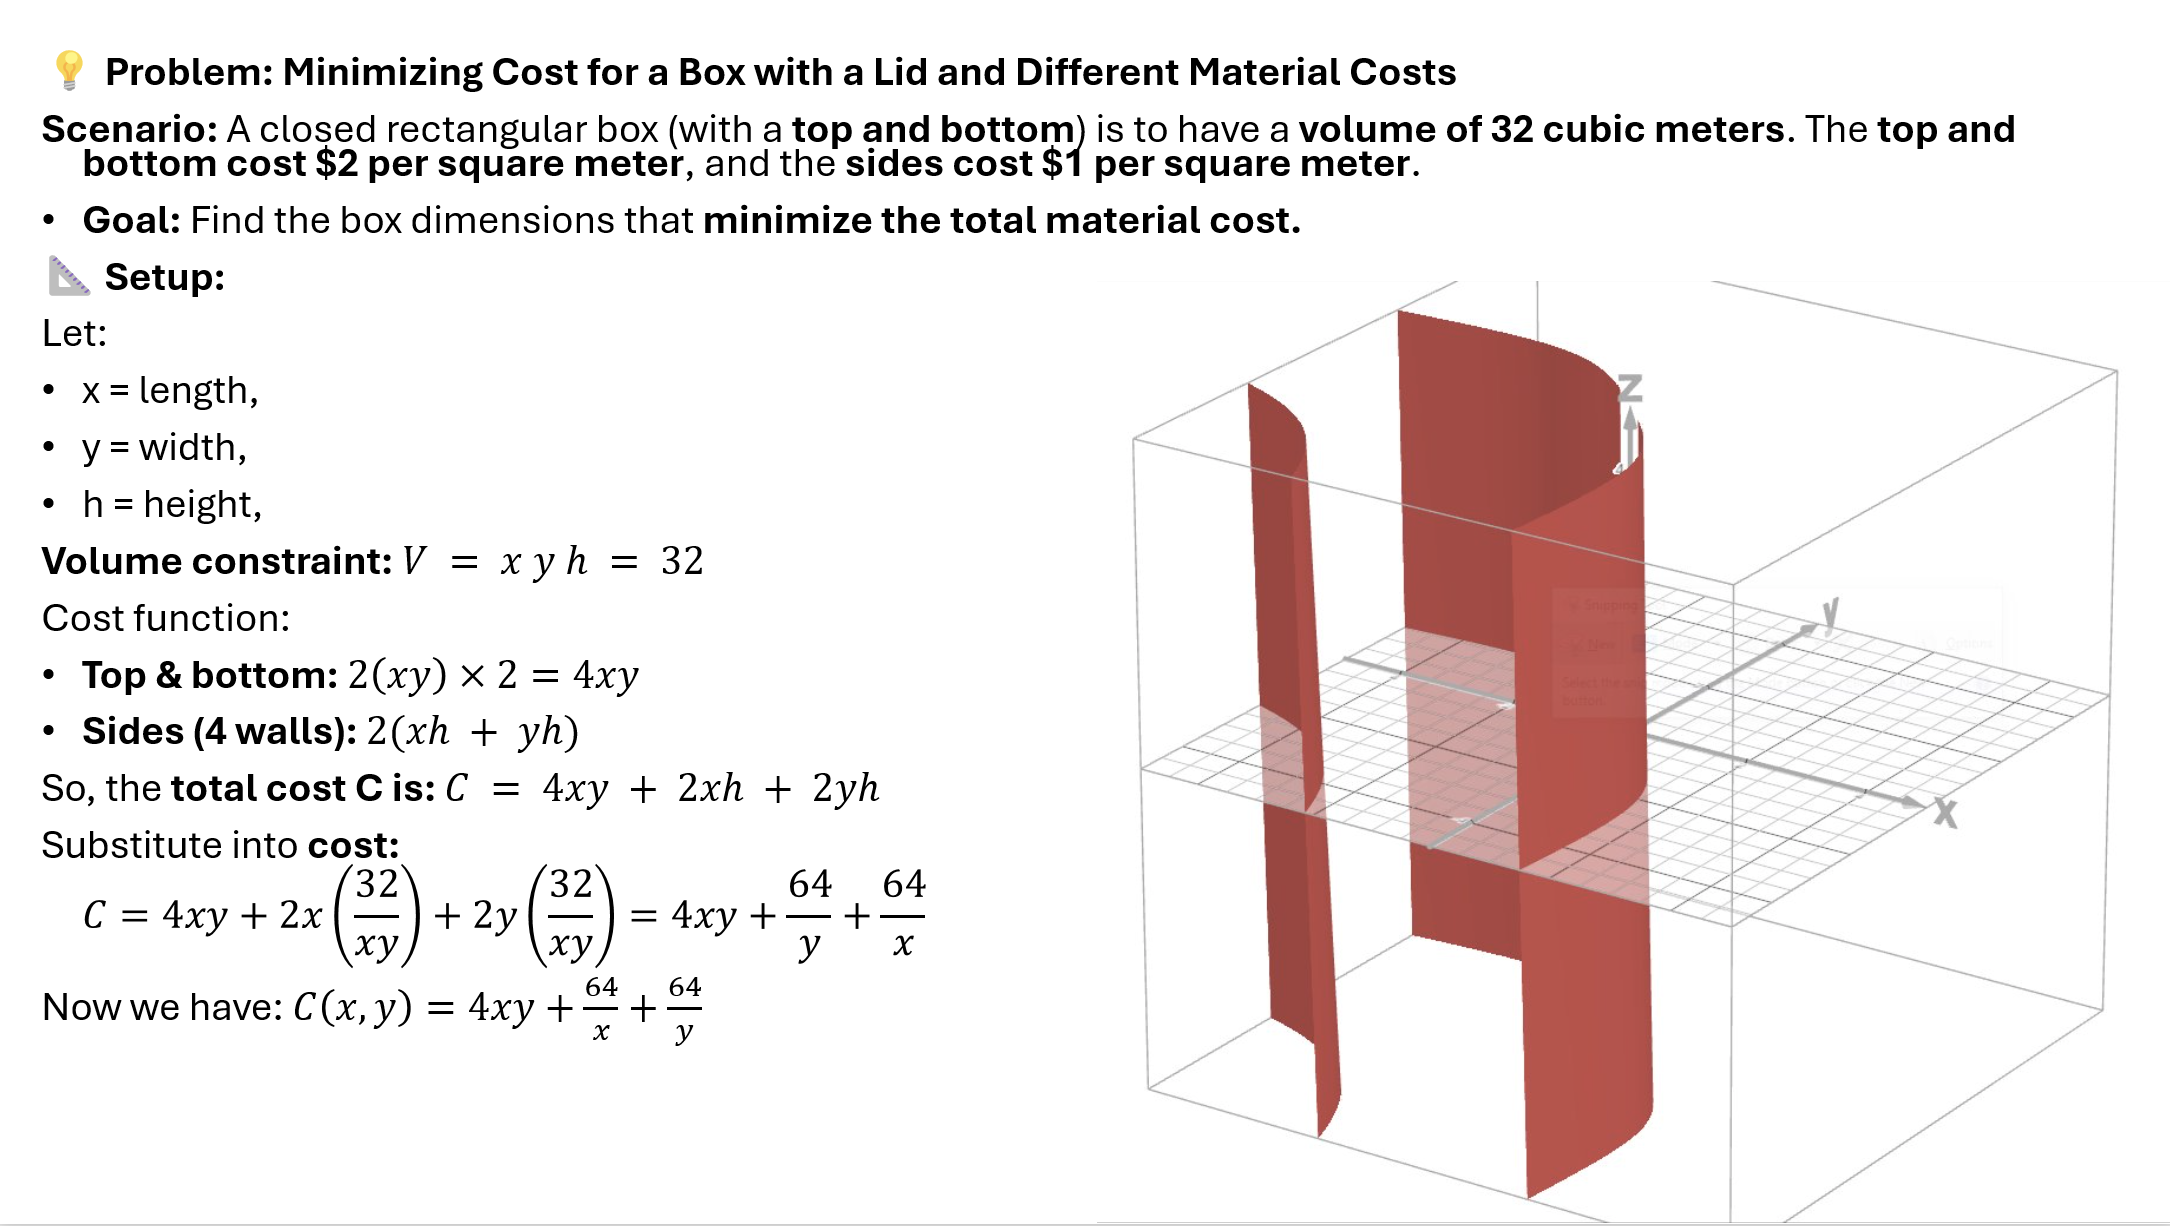

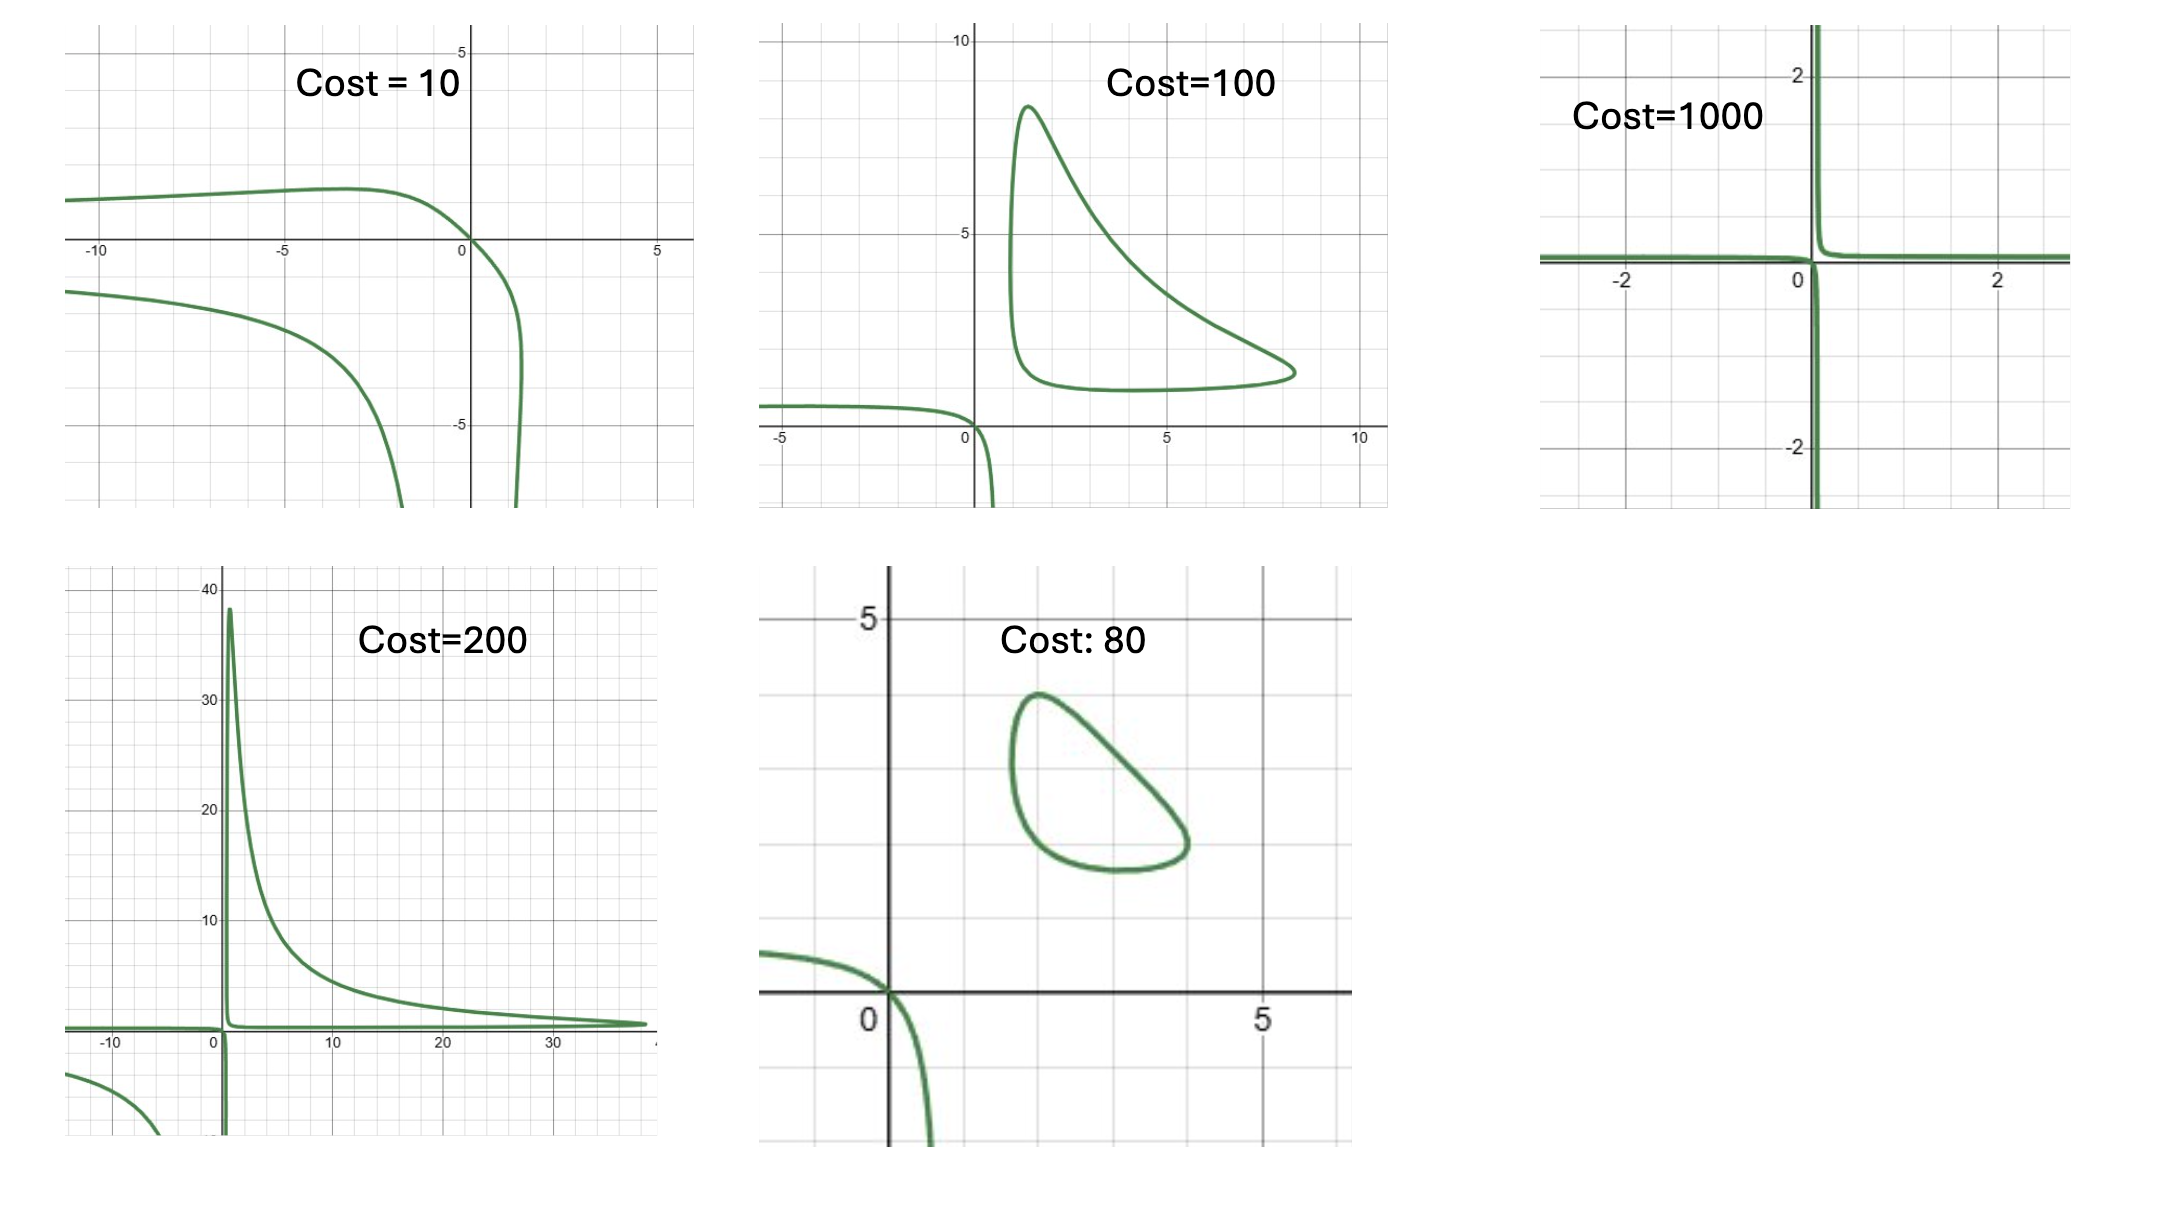

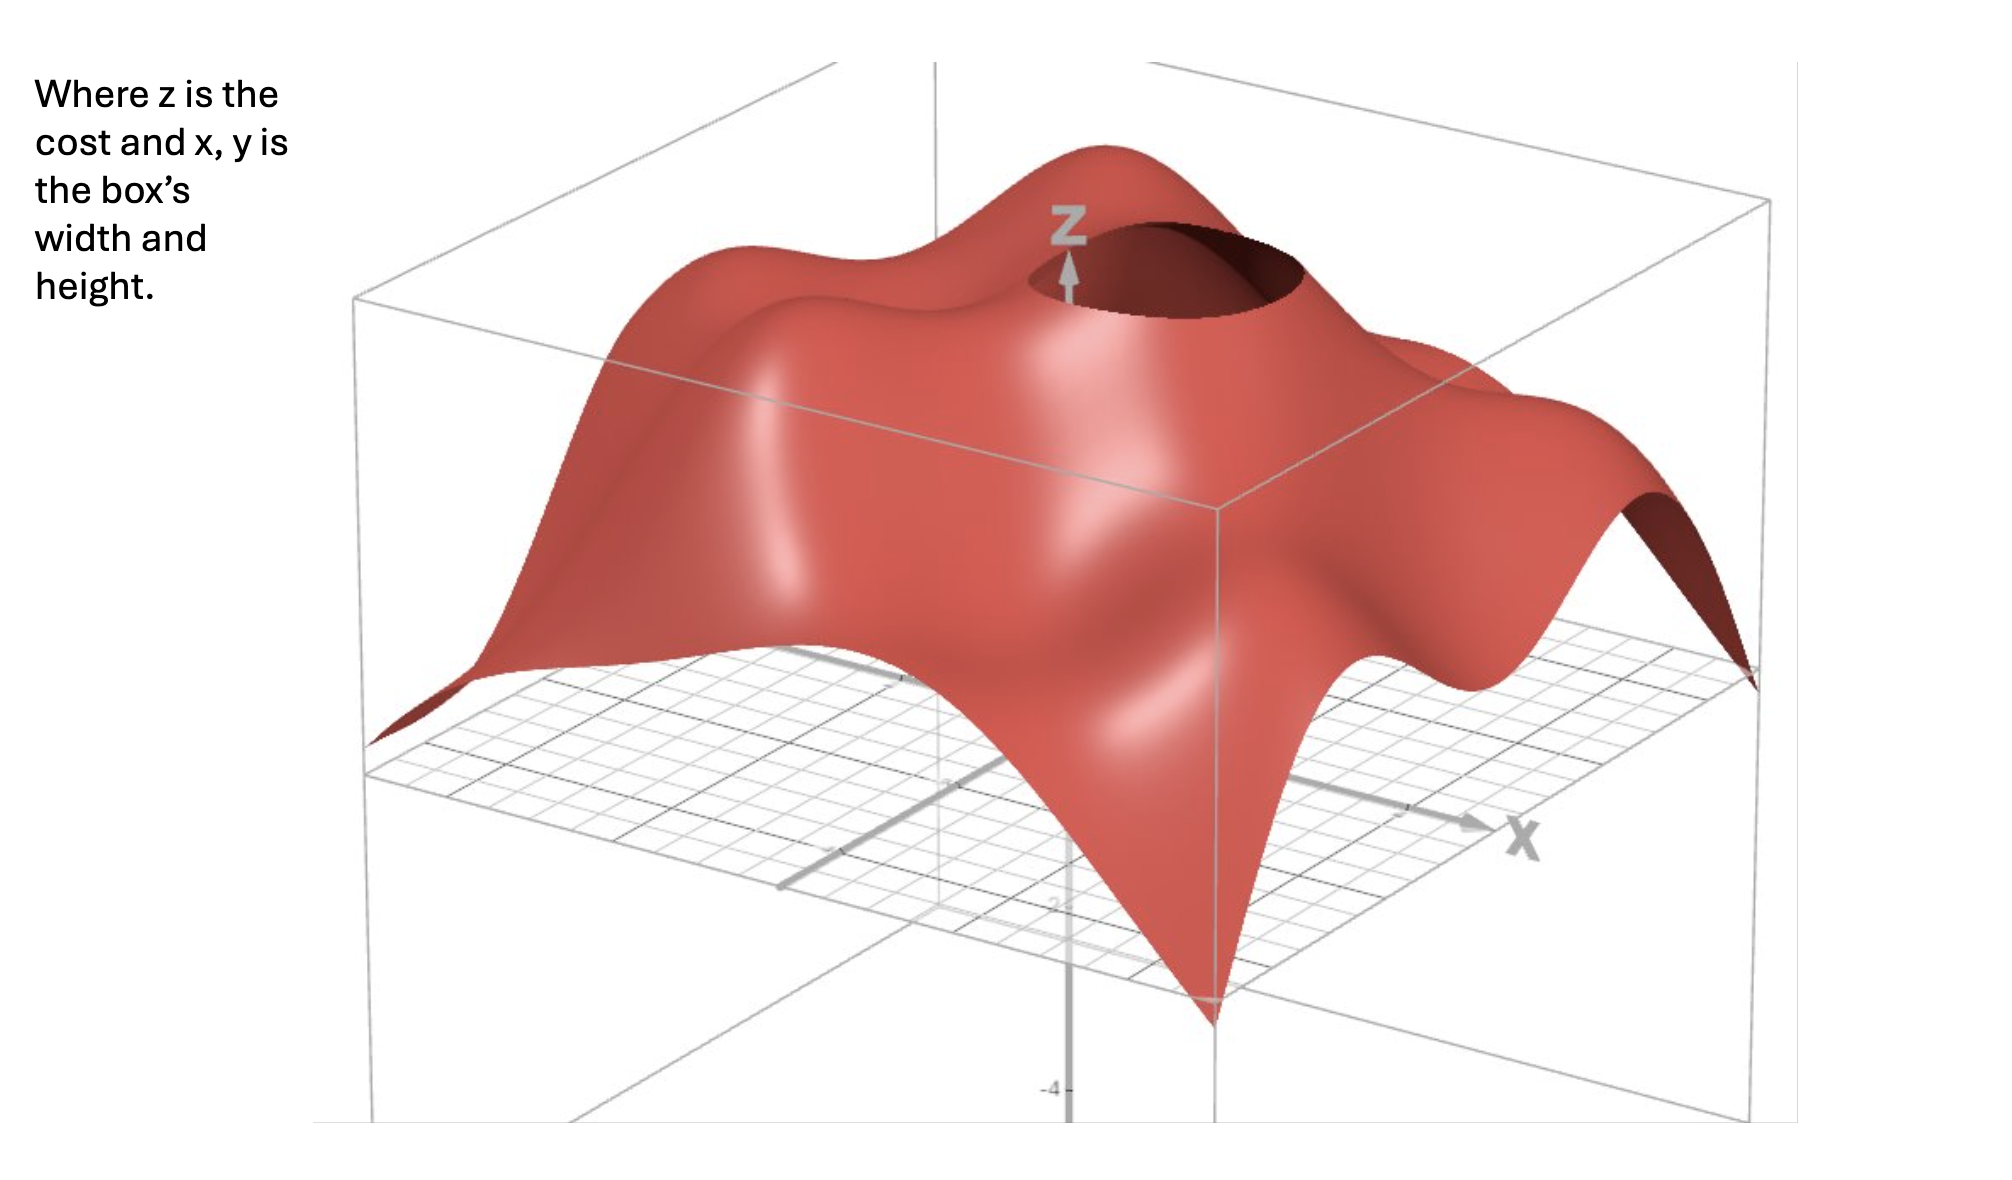

In [15]:
#Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0869
Test Accuracy: 0.9764999747276306


In [16]:
model.save('mnist_digit_classifier.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


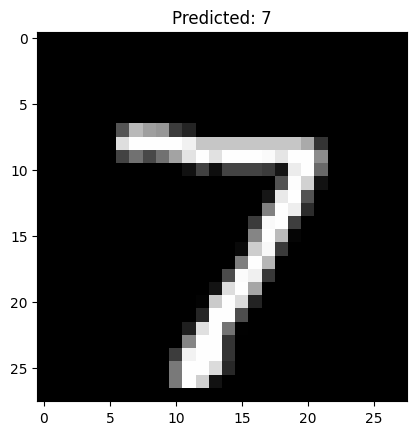

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


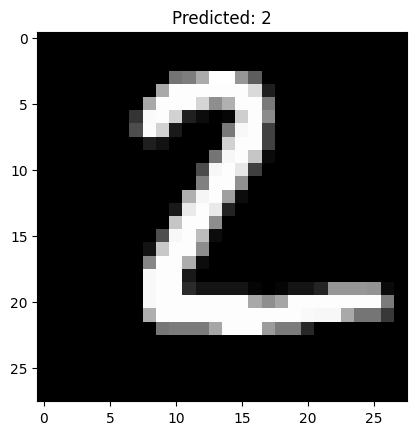

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


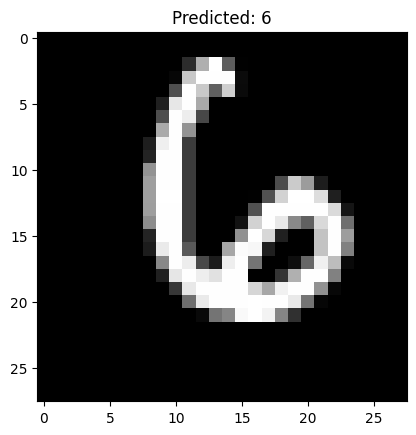

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


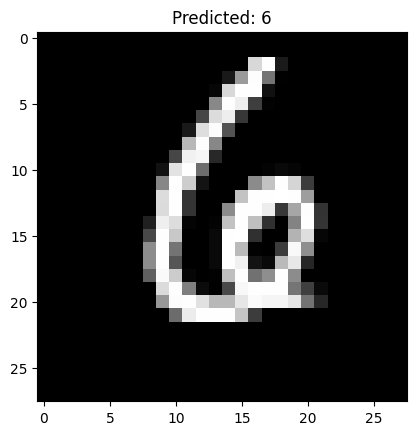

In [19]:
#Visualize Predictions

import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[0],cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()

import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[1], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[1])}")
plt.show()

import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[88], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[88])}")
plt.show()

import numpy as np
predictions = model.predict(X_test)
plt.imshow(X_test[123], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[123])}")
plt.show()

### **Improve Accuracy - Add Convolutional Neural Network (CNN)**​

CNNs work better with image data by capturing spatial patterns.​
Helps improve accuracy beyond basic dense layers.

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Reshape data for CNN​

X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)
cnn_model = Sequential([
	Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
	MaxPooling2D((2, 2)),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPooling2D((2, 2)),
	Flatten(),
	Dense(64, activation='relu'),
	Dropout(0.5),
	Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=5, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.8234 - loss: 0.5512 - val_accuracy: 0.9857 - val_loss: 0.0507
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.9670 - loss: 0.1116 - val_accuracy: 0.9882 - val_loss: 0.0407
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9764 - loss: 0.0799 - val_accuracy: 0.9897 - val_loss: 0.0337
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9794 - loss: 0.0677 - val_accuracy: 0.9892 - val_loss: 0.0371
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.9915 - val_loss: 0.0309


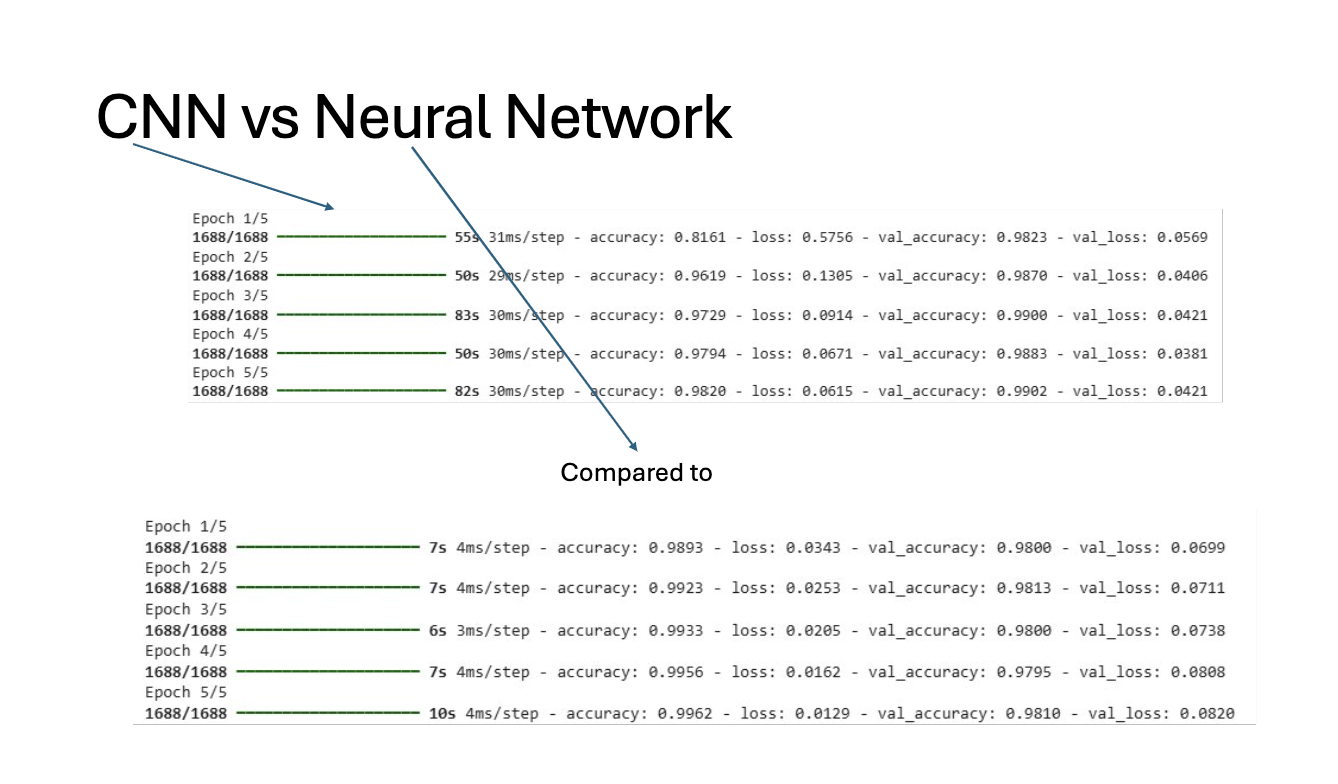